In [2]:
import pandas as pd
import numpy as np
import os
os.chdir('C:\\Users\\fangc\\Documents\\airbnb\\Airbnb Project')
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('clean_data.csv')

In [299]:
df.head(2)

,Confirmation code,Status,Guest name,Contact,# of adults,Start date,End date,# of nights,Booked,Booked_aheadday,Listing,Earnings,Bad,review,text,Text_counts,day_of_week_checkin,day_of_week_checkout,book_day_of_week,size
0,HMQM5YMPQC,Confirmed,Lukasz Majewski,'+48 793 641 008,2,2017-12-17,2018-02-28,73,2017-12-04,13,FULLY Furnished Silicon Valley Studio House,4764.41,0,1,I'm a Tesla contractor and I need a place to s...,38,Sunday,Wednesday,Monday,small
1,HM33MPJPAH,Confirmed,Betty Tse,'+1 (650) 996-3949,2,2017-12-18,2018-01-01,14,2017-11-14,34,Silicon Valley Entire Clean Modern 2B/2B Apart...,2227.12,0,1,We would like to know whether you have 2 parki...,18,Monday,Monday,Tuesday,middle


# Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group( good or bad)

In [5]:
# total number of records 
n_records=len(df)
# total number of good guests
n_good=len(df[df.Bad == 0])
# total number of bad guests
n_bad=len(df[df.Bad == 1])
# Percentage of individuals whose are bad guests
bad_percent =100* n_bad/(n_bad+n_good)

In [6]:
# Print the results
print("Total number of records: {}".format(n_records))
print("good guests: {}".format(n_good))
print("bad guests: {}".format(n_bad))
print("Percentage of bad guests: {}%".format(bad_percent))

Total number of records: 362
good guests: 331
bad guests: 31
Percentage of bad guests: 8.56353591160221%


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 20 columns):
Confirmation code       362 non-null object
Status                  362 non-null object
Guest name              362 non-null object
Contact                 362 non-null object
# of adults             362 non-null int64
Start date              362 non-null datetime64[ns]
End date                362 non-null datetime64[ns]
# of nights             362 non-null int64
Booked                  362 non-null datetime64[ns]
Booked_aheadday         362 non-null int64
Listing                 362 non-null object
Earnings                362 non-null float64
Bad                     362 non-null int64
review                  362 non-null int64
text                    362 non-null object
Text_counts             362 non-null int64
day_of_week_checkin     362 non-null object
day_of_week_checkout    362 non-null object
book_day_of_week        362 non-null object
size                    341 non-null obj

In [8]:
# change data type
df['Start date']=pd.to_datetime(df['Start date'])
df['End date']=pd.to_datetime(df['End date'])
df['Booked']=pd.to_datetime(df['Booked'])

** Featureset Exploration **

* **Status** : Confirmed 
* **Guest name** : Guest name
* **Contact**:guests contact information
* **# of adults**:discrete
* **# of nights**:discrete
* **Start date** : datetime
* **End date** :datetime
* **Booked** :datetime
* **Booked_aheadday** :discrete
* **Listing** : listing name
* **Earnings** :continuous
* **review** :discrete
* **text** :first message from guests
* **Text_counts**:discrete
* **day_of_week_checkin**: day of week
* **day_of_week_checkout**: day of week
* **book_day_of_week**: day of week
* **size**:small,middle,large
* **Bad** :0(good),1(bad)

## Preparing the Data

*Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as preprocessing.*

### Transforming Skewed Continuous Features

(array([73., 79., 62., 46., 31., 20., 13.,  8.,  4.,  5.,  3.,  1.,  5.,
         3.,  1.,  0.,  2.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         1.,  1.,  0.,  1.]),
 array([  67.9       ,  224.45033333,  381.00066667,  537.551     ,
         694.10133333,  850.65166667, 1007.202     , 1163.75233333,
        1320.30266667, 1476.853     , 1633.40333333, 1789.95366667,
        1946.504     , 2103.05433333, 2259.60466667, 2416.155     ,
        2572.70533333, 2729.25566667, 2885.806     , 3042.35633333,
        3198.90666667, 3355.457     , 3512.00733333, 3668.55766667,
        3825.108     , 3981.65833333, 4138.20866667, 4294.759     ,
        4451.30933333, 4607.85966667, 4764.41      ]),
 <a list of 30 Patch objects>)

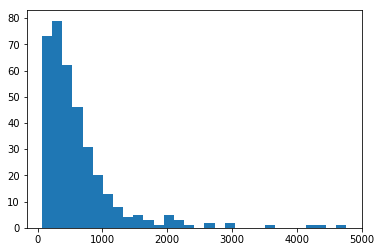

In [12]:
# plot the earnings in histogram
plt.hist(df.Earnings,bins=30)

In [14]:
# Split the data into features and target label
target = df.Bad
features_raw = df.drop('Bad', axis = 1)
# Log-transform the skewed features
skewed = 'Earnings'
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

## Normalizing Numerical Features

*since we have some numerical features that are highly skewed. we need to treat equally when applying supervised learners.*

In [19]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['# of adults', '# of nights', 'Booked_aheadday', 'review', 'Text_counts']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

In [20]:
features_log_minmax_transform.head()

,Confirmation code,Status,Guest name,Contact,# of adults,Start date,End date,# of nights,Booked,Booked_aheadday,Listing,Earnings,review,text,Text_counts,day_of_week_checkin,day_of_week_checkout,book_day_of_week,size
0,HMQM5YMPQC,Confirmed,Lukasz Majewski,'+48 793 641 008,0.090909,2017-12-17,2018-02-28,1.000000,2017-12-04,0.082840,FULLY Furnished Silicon Valley Studio House,8.469139,0.027778,I'm a Tesla contractor and I need a place to s...,0.262411,Sunday,Wednesday,Monday,small
1,HM33MPJPAH,Confirmed,Betty Tse,'+1 (650) 996-3949,0.090909,2017-12-18,2018-01-01,0.180556,2017-11-14,0.207101,Silicon Valley Entire Clean Modern 2B/2B Apart...,7.708913,0.027778,We would like to know whether you have 2 parki...,0.120567,Monday,Monday,Tuesday,middle
2,HMTNHF3BTP,Confirmed,Chen-Ying Huang,'+886 911 064 245,0.090909,2018-01-01,2018-01-03,0.013889,2017-12-28,0.029586,Silicon Valley Entire Clean Modern 2B/2B Apart...,5.951033,0.027778,This is Jane from Taiwan. I will go business t...,0.184397,Monday,Wednesday,Thursday,middle
3,HM34DBFBE4,Confirmed,Jeanie Jones,'+1 (530) 816-9026,0.181818,2018-02-04,2018-02-08,0.041667,2018-02-04,0.005917,Bay area Entire Luxury 1bedroom 1 bathroom,6.364320,0.000000,I am interested in renting your apartment. It ...,0.354610,Sunday,Thursday,Sunday,small
4,HM4TCEP3KF,Confirmed,Miya Zhao,'+86 186 0061 3291,0.090909,2018-02-10,2018-02-13,0.027778,2018-02-09,0.011834,Bay area Entire Luxury 1bedroom 1 bathroom,6.109492,0.083333,"Hi, I’m traveling to Bay Area theses days, I’d...",0.085106,Saturday,Tuesday,Friday,small


# Implementation: Data Preprocessing

*From the table in Exploring the Data above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called categorical variables) be converted. One popular way to convert categorical variables is by using the one-hot encoding scheme. One-hot encoding creates a "dummy" variable for each possible category of each non-numeric feature.*

In [21]:
# drop some non_useful columns
features_log_minmax_transform_clean=features_log_minmax_transform.drop(['Confirmation code','Status','Guest name','Contact','Start date','End date','Booked','Listing','text'],axis=1)

In [22]:
features_log_minmax_transform_clean.head()

,# of adults,# of nights,Booked_aheadday,Earnings,review,Text_counts,day_of_week_checkin,day_of_week_checkout,book_day_of_week,size
0,0.090909,1.000000,0.082840,8.469139,0.027778,0.262411,Sunday,Wednesday,Monday,small
1,0.090909,0.180556,0.207101,7.708913,0.027778,0.120567,Monday,Monday,Tuesday,middle
2,0.090909,0.013889,0.029586,5.951033,0.027778,0.184397,Monday,Wednesday,Thursday,middle
3,0.181818,0.041667,0.005917,6.364320,0.000000,0.354610,Sunday,Thursday,Sunday,small
4,0.090909,0.027778,0.011834,6.109492,0.083333,0.085106,Saturday,Tuesday,Friday,small


In [23]:
 # One-hot encode the 'features_log_minmax_transform_clean' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform_clean)

In [26]:
features_final.head()

,# of adults,# of nights,Booked_aheadday,Earnings,review,Text_counts,day_of_week_checkin_Friday,day_of_week_checkin_Monday,day_of_week_checkin_Saturday,day_of_week_checkin_Sunday,...,book_day_of_week_Friday,book_day_of_week_Monday,book_day_of_week_Saturday,book_day_of_week_Sunday,book_day_of_week_Thursday,book_day_of_week_Tuesday,book_day_of_week_Wednesday,size_large,size_middle,size_small
0,0.090909,1.000000,0.082840,8.469139,0.027778,0.262411,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0.090909,0.180556,0.207101,7.708913,0.027778,0.120567,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0.090909,0.013889,0.029586,5.951033,0.027778,0.184397,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0.181818,0.041667,0.005917,6.364320,0.000000,0.354610,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0.090909,0.027778,0.011834,6.109492,0.083333,0.085106,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [140]:
#try test
features_final_1=features_final.drop('Text_counts',axis=1)


In [27]:
# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

30 total features after one-hot encoding.


## Shuffle and Split Data

In [151]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 121)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 289 samples.
Testing set has 73 samples.


*we will be using F 0.5  score since we are willing to tell the proportion of bad guests, actually were bad.*

## Supervised Learning Models

# I use AdaBoost model in this case to see the performance.

*AdaBoost*

In [287]:
# created a train_predict function, so you can play around with other models to see the performance
from time import time
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner,X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: target training set
       - X_test: features testing set
       - y_test: target testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data 
    start = time() # Get start time
    learner.fit(X_train,y_train)
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end-start
        
    # Get the predictions on the test set(X_test),
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
            
    # Compute accuracy on the training 
    results['acc_train'] = accuracy_score(y_train,predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Compute F-score on the train using fbeta_score()
    results['f_train'] = fbeta_score(y_train,predictions_train,beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)
    # Return the results    
    return results

## Implementation: Initial Model Evaluation

In [289]:
# Import the learning model from sklearn
from sklearn.ensemble import AdaBoostClassifier


In [290]:
# Initialize the models
clf_C = AdaBoostClassifier(random_state = 46,learning_rate= 1)


In [291]:
# check the model parameters by defa
clf_C

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=50, random_state=46)

In [292]:
train_predict(clf_C,X_train, y_train, X_test, y_test,)

{'train_time': 0.12399911880493164,
 'pred_time': 0.014383554458618164,
 'acc_train': 0.9584775086505191,
 'acc_test': 0.9178082191780822,
 'f_train': 0.8421052631578948,
 'f_test': 0.25}

*Accuracy score for train and test is 0.95 and 0.91, so there is no overfitting or underfitting problem*

In [296]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
# Initialize the classifier
clf = AdaBoostClassifier(base_estimator =DecisionTreeClassifier())

# Create the parameters list you wish to tune, using a dictionary if needed.

parameters = {'algorithm':['SAMME.R','SAMME'],'n_estimators':[50,100,150,200,250],'learning_rate':[0.8,1,1.2,1.5]}

In [297]:
# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,parameters,scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit =grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Report the before-and-afterscores


print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))


Final accuracy score on the testing data: 0.9452


*The final accuracy score on the testing data increased 3% to 94.5% accuracy score*

In [284]:
print(best_clf)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=50, random_state=None)


In [198]:
# Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier().fit(X_train,y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

In [199]:
importances

array([0.06, 0.02, 0.14, 0.44, 0.06, 0.14, 0.  , 0.  , 0.02, 0.04, 0.  ,
       0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  ,
       0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02])

*The import features in predicting good or bad guests are  'Earnings','Booked_aheadday','Text_count', '# of review'*

# Inclusion

*The more earnings on a signel payment, the more good guests you will expect. The more days ahead that guests make the resevation, the more show the guests are planned. The more greeting words that the guests sent at the beginning, the higher probability this group is good.*